In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import ravel
from numpy import transpose
import sklearn
import seaborn
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
seaborn.set(style="ticks")

In [2]:

# url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTKQyU5xY2jjMFQy24fWFs2CWrPlHKo4RedaQyoDHn1TNotqrhKPFD7z1dEaydEHe4fLPlXw-QQn38o/pub?gid=1805190093&single=true&output=csv"
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5JE66pQB1KJItYr2QUVldTeOGDUfgWwV8u5VdmGkkm6fjZgwCU0-owOzBFakl_aYfsF2aL6xNxRwc/pub?gid=1426322464&single=true&output=csv"
# colmns = ["name", "date", "imp_trade_value_usd", "exp_trade_value_usd", "freq_sum", "t", "log_imp_value", "log_exp_value", "log_freq"]
colmns = ["name", "date", "exp_imp_sum", "freq_sum", "t"]
data = pd.read_csv(url, usecols = colmns)
unique_items = data.loc[:, "name"].unique()

In [3]:
data.head(3)

,name,date,freq_sum,t,exp_imp_sum
0,Пальмовое масло,1990,15,1,2511854778
1,Пальмовое масло,1991,5,2,3134348074
2,Пальмовое масло,1992,18,3,4157283328


In [4]:
data['freq_sum'].describe()

count      1247.000000
mean      14905.119487
std       60565.156285
min           1.000000
25%         519.500000
50%        2176.000000
75%        8062.500000
max      968096.000000
Name: freq_sum, dtype: float64

In [5]:
data.dtypes

name           object
date            int64
freq_sum        int64
t               int64
exp_imp_sum     int64
dtype: object

In [6]:
palm = data[data.loc[:,"name"] == "Пальмовое масло"]
strawberries = data[data.loc[:,"name"] == "Клубника"]
silk = data[data.loc[:,"name"] == "Шелк"]

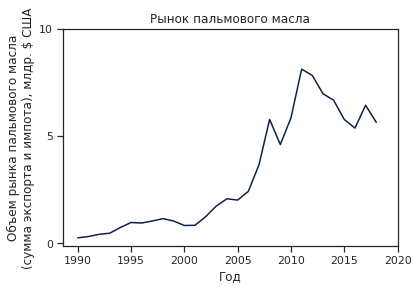

In [7]:
plt.plot(palm.date, palm.exp_imp_sum, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка пальмового масла\n(сумма экспорта и импота), млдр. $ США")
plt.title("Рынок пальмового масла")
values = [0, 5*10**10, 10*10**10]
labels = [0, 5, 10]
plt.yticks(values, labels)
plt.xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.show()

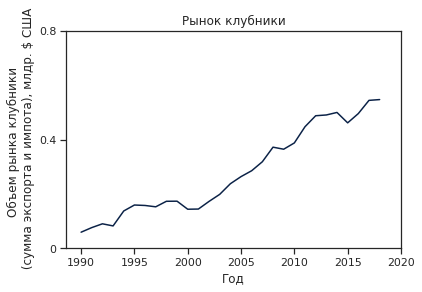

In [8]:
plt.plot(strawberries.date, strawberries.exp_imp_sum, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка клубники \n (сумма экспорта и импота), млдр. $ США")
plt.title("Рынок клубники")
values = [0, 0.4*10**10, 0.8*10**10]
labels = [0, 0.4, 0.8]
plt.yticks(values, labels)
plt.xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.show()

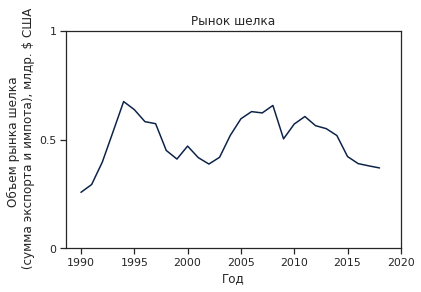

In [9]:
plt.plot(silk.date, silk.exp_imp_sum, color = "#0b2247")
plt.xlabel("Год")
plt.ylabel("Объем рынка шелка \n (сумма экспорта и импота), млдр. $ США")
plt.title("Рынок шелка")
values = [0, 0.5*10**10, 1*10**10]
labels = [0, 0.5, 1]
plt.yticks(values, labels)
plt.xticks([1990, 1995, 2000, 2005, 2010, 2015, 2020], [1990, 1995, 2000, 2005, 2010, 2015, 2020])
plt.show()

In [10]:
data.describe()

,date,freq_sum,t,exp_imp_sum
count,1247.000000,1247.000000,1247.000000,1.247000e+03
mean,2004.000000,14905.119487,15.000000,4.947228e+10
std,8.369957,60565.156285,8.369957,2.506710e+11
min,1990.000000,1.000000,1.000000,8.968629e+07
25%,1997.000000,519.500000,8.000000,1.808279e+09
50%,2004.000000,2176.000000,15.000000,6.427610e+09
75%,2011.000000,8062.500000,22.000000,1.850857e+10
max,2018.000000,968096.000000,29.000000,3.170000e+12


In [11]:
data.corr()

,date,freq_sum,t,exp_imp_sum
date,1.000000,0.220260,1.000000,0.131586
freq_sum,0.220260,1.000000,0.220260,0.012602
t,1.000000,0.220260,1.000000,0.131586
exp_imp_sum,0.131586,0.012602,0.131586,1.000000


In [12]:
from scipy.stats.stats import pearsonr

In [13]:
list_ = []
results = []
for item_name in unique_items:

    a = data[data["name"] == item_name].exp_imp_sum
    b = data[data["name"] == item_name].freq_sum
    list_.append(pearsonr(a, b)[0])
    results.append({"Товар":item_name, "Коэффициент Пирсона":pearsonr(a, b)[0], "Значимость":pearsonr(a, b)[1]})
    if pearsonr(a, b)[1] < 0.05:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. значим на уровне дов. вер-ти в 95%")
    else:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. НЕ значим на уровне дов. вер-ти в 95%")
print("")
print(np.array(list_).mean())

Пальмовое масло : 0.876, стат. значим на уровне дов. вер-ти в 95%
Сахар : 0.829, стат. значим на уровне дов. вер-ти в 95%
Железная руда : 0.861, стат. значим на уровне дов. вер-ти в 95%
Медь : 0.931, стат. значим на уровне дов. вер-ти в 95%
Никель : 0.813, стат. значим на уровне дов. вер-ти в 95%
Алюминий : 0.919, стат. значим на уровне дов. вер-ти в 95%
Свинец : 0.831, стат. значим на уровне дов. вер-ти в 95%
Цинк : 0.844, стат. значим на уровне дов. вер-ти в 95%
Олово : 0.775, стат. значим на уровне дов. вер-ти в 95%
Сырая нефть : 0.587, стат. значим на уровне дов. вер-ти в 95%
Серебро : 0.813, стат. значим на уровне дов. вер-ти в 95%
Платина : 0.748, стат. значим на уровне дов. вер-ти в 95%
Хлористый калий : 0.837, стат. значим на уровне дов. вер-ти в 95%
Говядина : 0.941, стат. значим на уровне дов. вер-ти в 95%
Свинина : 0.894, стат. значим на уровне дов. вер-ти в 95%
Баранина : 0.886, стат. значим на уровне дов. вер-ти в 95%
Конина : 0.204, стат. НЕ значим на уровне дов. вер-ти в

In [14]:
correlations = pd.DataFrame(results)[['Товар', 'Коэффициент Пирсона', 'Значимость']]
correlations

,Товар,Коэффициент Пирсона,Значимость
0,Пальмовое масло,0.876477,4.611030e-10
1,Сахар,0.828959,2.777974e-08
2,Железная руда,0.861241,2.017851e-09
3,Медь,0.930741,2.599133e-13
4,Никель,0.813353,8.182674e-08
5,Алюминий,0.918606,2.136513e-12
6,Свинец,0.830920,2.406965e-08
7,Цинк,0.844458,8.491871e-09
8,Олово,0.775119,7.931267e-07
9,Сырая нефть,0.587100,8.138459e-04


In [15]:
# correlations.to_csv("corr_comtrade.csv")

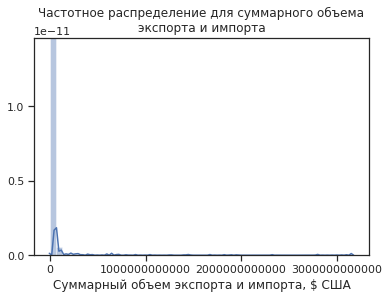

In [16]:
plt.locator_params(nbins=4)
seaborn.distplot(data.exp_imp_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для суммарного объема\nэкспорта и импорта"
plt.title(name)
plt.xlabel("Суммарный объем экспорта и импорта, $ США")
plt.ylabel("")
plt.savefig(name)
plt.show()

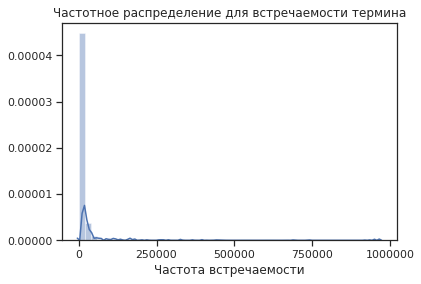

In [17]:
plt.locator_params(nbins=5)
plot = seaborn.distplot(data.freq_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для встречаемости термина"
plt.title(name)
plt.xlabel("Частота встречаемости")
plt.ylabel("")
# plt.show()
plt.savefig(name)

In [18]:
data['sum_volume_log10'] = np.log10(data['exp_imp_sum'])
data['freq_sum_log10'] = np.log10(data['freq_sum'])

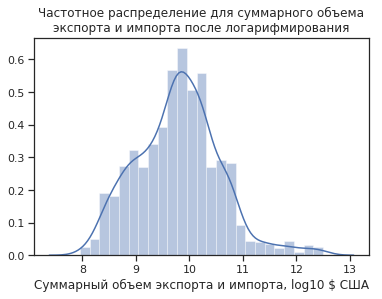

In [19]:
seaborn.distplot(data.sum_volume_log10).ticklabel_format(axis = 'x',style = "plain")
plt.xlabel("Суммарный объем экспорта и импорта, log10 $ США")
plt.ylabel("")
name = "Частотное распределение для суммарного объема\nэкспорта и импорта после логарифмирования"
plt.title(name)
plt.show()

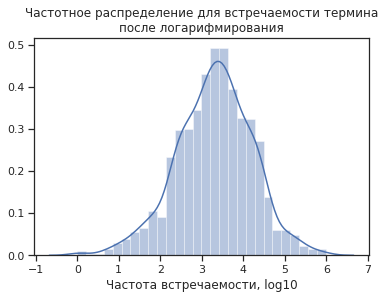

In [20]:
seaborn.distplot(data.freq_sum_log10).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для встречаемости термина\nпосле логарифмирования"
plt.title(name)
plt.xlabel("Частота встречаемости, log10")
plt.ylabel("")
plt.show()

# Linear regression

In [21]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [23]:
mod = sm.OLS(data.sum_volume_log10, data.freq_sum_log10)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_volume_log10   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.931e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:57:47   Log-Likelihood:                -2870.7
No. Observations:                1247   AIC:                             5743.
Df Residuals:                    1246   BIC:                             5749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.7788      0.020    138.

In [24]:
linear_regressor = LinearRegression(fit_intercept = True)
fitt = linear_regressor.fit(data[['freq_sum_log10']], data[['sum_volume_log10']])
Y_pred = linear_regressor.predict(data[['freq_sum_log10']])
linear_regressor.score(data[['freq_sum_log10']], data[['sum_volume_log10']])

0.1493712767887715

In [25]:
data.exp_imp_sum.max()

3170000000000

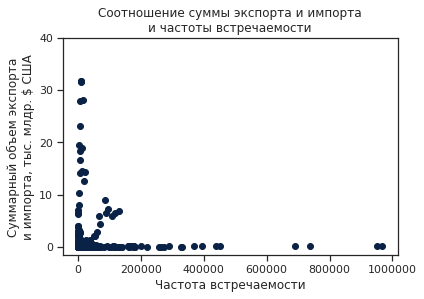

In [26]:
plt.scatter(data.freq_sum, data.exp_imp_sum, color = "#0b2247")
plt.xlabel("Частота встречаемости")
plt.ylabel("Суммарный объем экспорта\nи импорта, тыс. млдр. $ США")
plt.title("Соотношение суммы экспорта и импорта\nи частоты встречаемости")
values = [0, 1*10**12, 2*10**12, 3*10**12, 4*10**12]
labels = [0, 10, 20, 30, 40]
plt.yticks(values, labels)
plt.show()

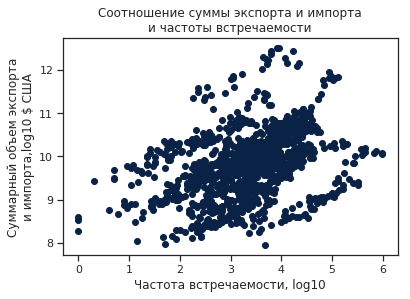

In [27]:
plt.scatter(data[['freq_sum_log10']], data[['sum_volume_log10']], color = "#0b2247")
plt.xlabel("Частота встречаемости, log10")
plt.ylabel("Суммарный объем экспорта\nи импорта,log10 $ США")
plt.title("Соотношение суммы экспорта и импорта\nи частоты встречаемости")
plt.show()

In [28]:
logged_data = data[['name', 'sum_volume_log10', 'freq_sum_log10', 't']]

In [29]:
logged_data.corr()

,sum_volume_log10,freq_sum_log10,t
sum_volume_log10,1.000000,0.386486,0.405324
freq_sum_log10,0.386486,1.000000,0.563090
t,0.405324,0.563090,1.000000


In [30]:
X_log = logged_data[['freq_sum_log10']]
Y_log = logged_data['sum_volume_log10']

In [31]:
mod = sm.OLS(Y_log, X_log)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_volume_log10   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.931e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:57:56   Log-Likelihood:                -2870.7
No. Observations:                1247   AIC:                             5743.
Df Residuals:                    1246   BIC:                             5749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.7788      0.020    138.

In [32]:
model__ = RandomForestRegressor(n_estimators=200, random_state=12)
model__.fit(X_log, ravel(Y_log))
prediction_1 = model__.predict(X_log)
r2_score(Y_log, prediction_1)

0.7856485263331301

In [33]:
model__ = SVR(kernel='linear')
model__.fit(X_log, ravel(Y_log))
prediction_1 = model__.predict(X_log)
r2_score(Y_log, prediction_1)

0.1492909828126292

# Model definition (RFR)

In [34]:
model__ = RandomForestRegressor(n_estimators=250, random_state=12)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Пальмовое масло скор составляет 0.39
Для Сахар скор составляет 0.68
Для Железная руда скор составляет 0.111
Для Медь скор составляет 0.767
Для Никель скор составляет 0.656
Для Алюминий скор составляет 0.116
Для Свинец скор составляет 0.992
Для Цинк скор составляет 0.804
Для Олово скор составляет -3.59
Для Сырая нефть скор составляет -1.34
Для Серебро скор составляет 0.966
Для Платина скор составляет 0.578
Для Хлористый калий скор составляет 0.517
Для Говядина скор составляет 0.683
Для Свинина скор составляет 0.201
Для Баранина скор составляет 0.749
Для Конина скор составляет -3.14
Для Ячмень скор составляет 0.452
Для Маис скор составляет -0.167
Для Золото скор составляет 0.569
Для Чай скор составляет 0.606
Для Рожь скор составляет -4.15
Для Овес скор составляет -0.143
Для Рис скор составляет 0.937
Для Какао скор составляет 0.661
Для Резина скор составляет 0.759
Для Молоко скор составляет 0.853
Для Сыр скор составляет 0.727
Для Яйца скор составляет 0.485
Для Мед скор составляет -0.1

In [36]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [37]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])

In [38]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.7059785492182193

In [39]:
RFR_MSE = mean_squared_error(actuals_new, model_predicts_new)
RFR_MSE

5.1972961978883285e+19

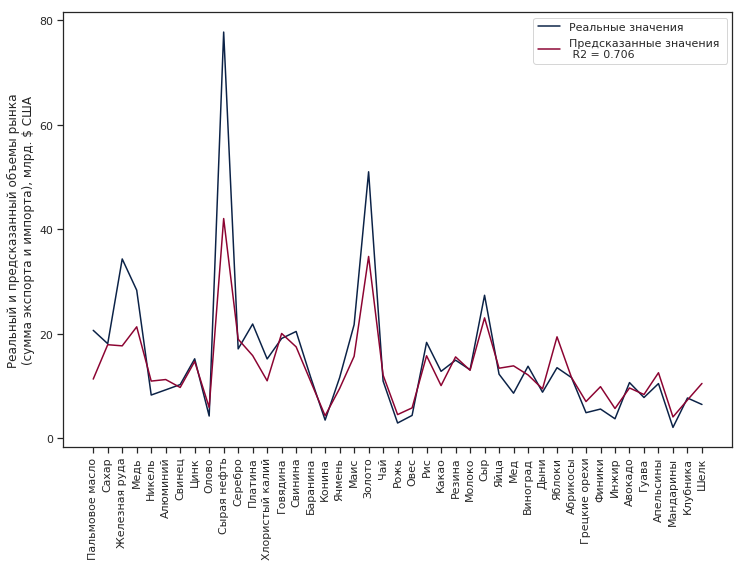

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(43))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10, 8*10**10]
labels = [0, 20, 40, 60, 80]
plt.yticks(values, labels)
# plt.xlabel("Товар")
plt.ylabel("Реальный и предсказанный объемы рынка\n(сумма экспорта и импорта), млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
ax = plt.gca()
plt.show()

In [41]:
unique_items

array(['Пальмовое масло', 'Сахар', 'Железная руда', 'Медь', 'Никель',
       'Алюминий', 'Свинец', 'Цинк', 'Олово', 'Сырая нефть', 'Серебро',
       'Платина', 'Хлористый калий', 'Говядина', 'Свинина', 'Баранина',
       'Конина', 'Ячмень', 'Маис', 'Золото', 'Чай', 'Рожь', 'Овес', 'Рис',
       'Какао', 'Резина', 'Молоко', 'Сыр', 'Яйца', 'Мед', 'Виноград',
       'Дыни', 'Яблоки', 'Абрикосы', 'Грецкие орехи', 'Финики', 'Инжир',
       'Авокадо', 'Гуава', 'Апельсины', 'Мандарины', 'Клубника', 'Шелк'],
      dtype=object)

# Model with similarity (to test)

In [42]:
model__ = RandomForestRegressor(n_estimators=250, random_state=12)
# train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:

    length_out = len(logged_data[logged_data.loc[:, "name"] == item].name)
    
    

    """Get data from microservice"""
    for term in unique_items:
        for opposite_term in unique_items:
            if term == opposite_term:
                continue
            try:
                url = f"http://api.ifora.hse.ru/vector_space/v0.2/w2v_2019_02_18/{term}/similarity/{opposite_term}"
                r = requests.get(url=url)
                data = r.json()
                results.append({"term": term, "opposite_term": opposite_term, "similarity": data["data"]["similarity"]}
            except Exception:
                pass

    
    similarity = []
    for i in range(len(results)):
        if results[i].get("term") == item:
            value_array = [results[i].get("similarity")]
            similarity.append({"term":results[i].get("opposite_term"), "val":value_array})
    
    """Get ordered results"""
    ordered_results = []
    for name in unique_items:
        for i in range(len(similarity)):
            dict_use = similarity[i]
            if dict_use.get("term") == name:
                ordered_results.append(dict_use.get("val"))
    
    """Get values vector"""
    value_vec = []
    i = 0
    for name in unique_items:
        value_vec.extend(ordered_results[i]*length_out)
        i +=1
    print(value_vec)
    

    

    """Model data def"""
    logged_data_sim = logged_data.copy(deep = True)
    logged_data_sim["similarity"] = value_vec # add a columns with similarity data for term
    test = logged_data_sim[logged_data_sim.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t", "similarity"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    
    """Model def"""
    for item_ in unique_items:      
        train_ = logged_data_sim[logged_data_sim.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t", "similarity"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

IndentationError: unexpected indent (<ipython-input-42-bc01a59e3295>, line 18)

In [ ]:
actuals_new_sim = []
for i in range(len(actuals)):
    actuals_new_sim.append(actuals[i][-1])

model_predicts_new_sim = []
for i in range(len(model_predicts)):
    model_predicts_new_sim.append(model_predicts[i][-1])

In [ ]:
r2score_sim = r2_score(actuals_new, model_predicts_new)
r2score_sim

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(26))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new_sim, color = "#0b2247")
plot2, = plt.plot(model_predicts_new_sim, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {r2score_sim:.3}"])
plt.show()

# Other models

### Linear regression

In [43]:
model__ = LinearRegression(fit_intercept = True)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Пальмовое масло скор составляет -0.896
Для Сахар скор составляет -1.43
Для Железная руда скор составляет -1.68
Для Медь скор составляет -0.461
Для Никель скор составляет -0.305
Для Алюминий скор составляет -2.09
Для Свинец скор составляет -1.75
Для Цинк скор составляет 0.717
Для Олово скор составляет -49.4
Для Сырая нефть скор составляет -6.59
Для Серебро скор составляет 0.452
Для Платина скор составляет -0.991
Для Хлористый калий скор составляет -0.605
Для Говядина скор составляет -1.76
Для Свинина скор составляет -2.53
Для Баранина скор составляет 0.923
Для Конина скор составляет -44.0
Для Ячмень скор составляет 0.492
Для Маис скор составляет -3.41
Для Золото скор составляет -1.41
Для Чай скор составляет 0.663
Для Рожь скор составляет -1.01e+02
Для Овес скор составляет -29.1
Для Рис скор составляет -0.21
Для Какао скор составляет 0.64
Для Резина скор составляет -0.351
Для Молоко скор составляет 0.869
Для Сыр скор составляет -1.28
Для Яйца скор составляет -0.0988
Для Мед скор сост

In [44]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [45]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])

In [46]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.022614856351508283

In [47]:
MSE = mean_squared_error(actuals_new, model_predicts_new)
MSE

1.727683499775322e+20

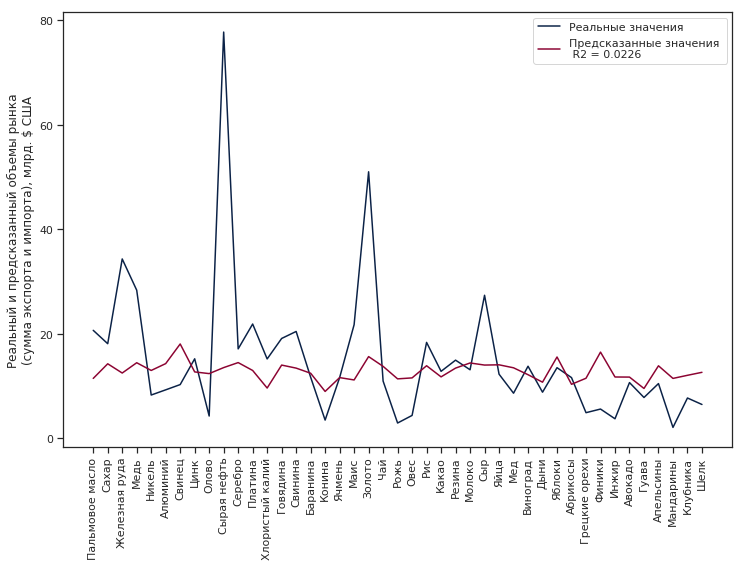

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(43))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10, 8*10**10]
labels = [0, 20, 40, 60, 80]
plt.yticks(values, labels)
# plt.xlabel("Товар")
plt.ylabel("Реальный и предсказанный объемы рынка\n(сумма экспорта и импорта), млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
ax = plt.gca()
plt.show()

### SVR (linear kernel)

In [49]:
model__ = SVR(kernel='linear')
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Пальмовое масло скор составляет -0.99
Для Сахар скор составляет -1.34
Для Железная руда скор составляет -1.72
Для Медь скор составляет -0.464
Для Никель скор составляет -0.332
Для Алюминий скор составляет -2.11
Для Свинец скор составляет -2.24
Для Цинк скор составляет 0.699
Для Олово скор составляет -48.8
Для Сырая нефть скор составляет -6.6
Для Серебро скор составляет 0.452
Для Платина скор составляет -1.01
Для Хлористый калий скор составляет -0.77
Для Говядина скор составляет -1.64
Для Свинина скор составляет -2.51
Для Баранина скор составляет 0.944
Для Конина скор составляет -36.0
Для Ячмень скор составляет 0.467
Для Маис скор составляет -3.55
Для Золото скор составляет -1.39
Для Чай скор составляет 0.678
Для Рожь скор составляет -96.5
Для Овес скор составляет -27.5
Для Рис скор составляет -0.182
Для Какао скор составляет 0.602
Для Резина скор составляет -0.323
Для Молоко скор составляет 0.883
Для Сыр скор составляет -1.26
Для Яйца скор составляет -0.212
Для Мед скор составляет 

In [50]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [51]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])

In [52]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.006573779641599886

In [53]:
MSE = mean_squared_error(actuals_new, model_predicts_new)
MSE

1.756038650997373e+20

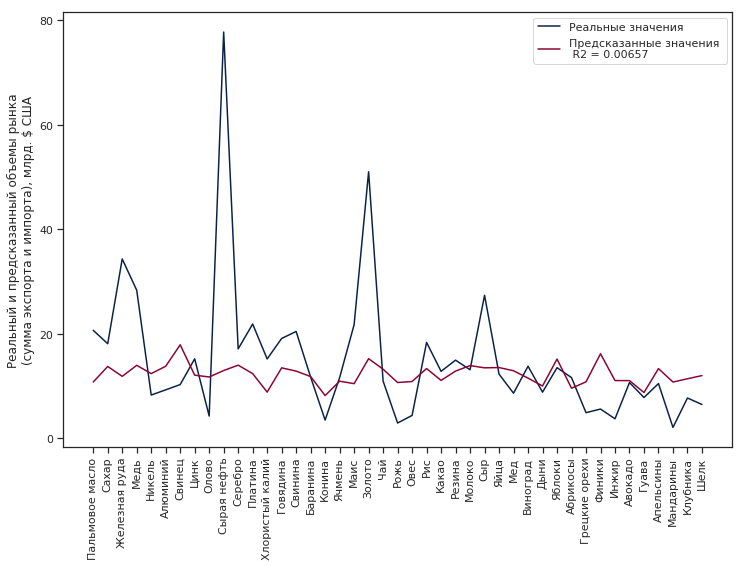

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(43))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10, 8*10**10]
labels = [0, 20, 40, 60, 80]
plt.yticks(values, labels)
# plt.xlabel("Товар")
plt.ylabel("Реальный и предсказанный объемы рынка\n(сумма экспорта и импорта), млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
ax = plt.gca()
plt.show()

### SVR (non-linear kernel)

In [55]:
model__ =SVR(kernel='rbf')
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Пальмовое масло скор составляет -0.989
Для Сахар скор составляет -0.0288
Для Железная руда скор составляет -1.66
Для Медь скор составляет 0.191
Для Никель скор составляет -0.788
Для Алюминий скор составляет -6.68
Для Свинец скор составляет 0.961
Для Цинк скор составляет 0.787
Для Олово скор составляет -55.1
Для Сырая нефть скор составляет -6.33
Для Серебро скор составляет 0.929
Для Платина скор составляет -0.566
Для Хлористый калий скор составляет -0.887
Для Говядина скор составляет -0.183
Для Свинина скор составляет -1.59
Для Баранина скор составляет 0.905
Для Конина скор составляет -35.4
Для Ячмень скор составляет 0.298
Для Маис скор составляет -3.93
Для Золото скор составляет -1.24
Для Чай скор составляет -1.64
Для Рожь скор составляет -80.9
Для Овес скор составляет -21.9
Для Рис скор составляет 0.654
Для Какао скор составляет 0.508
Для Резина скор составляет 0.455
Для Молоко скор составляет 0.0593
Для Сыр скор составляет -0.305
Для Яйца скор составляет -2.7
Для Мед скор составл

In [56]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [57]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])

In [58]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.06567867152895313

In [59]:
MSE = mean_squared_error(actuals_new, model_predicts_new)
MSE

1.6515613657292544e+20

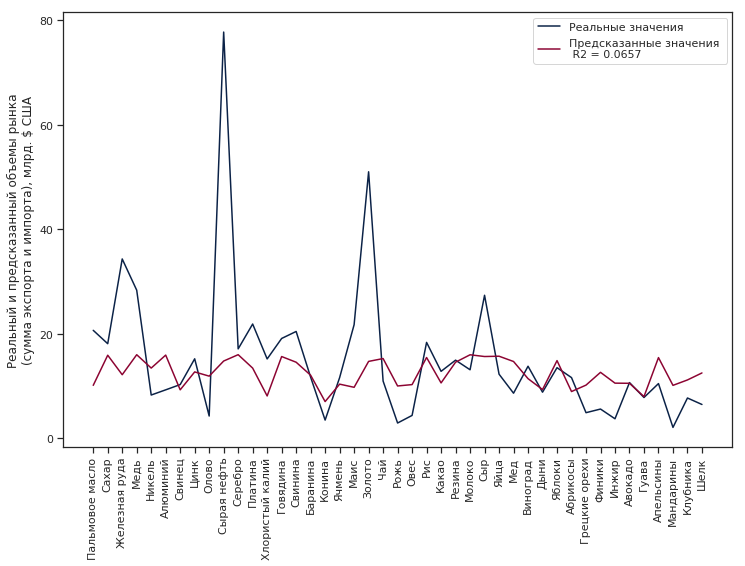

In [60]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(43))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10, 8*10**10]
labels = [0, 20, 40, 60, 80]
plt.yticks(values, labels)
# plt.xlabel("Товар")
plt.ylabel("Реальный и предсказанный объемы рынка\n(сумма экспорта и импорта), млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
ax = plt.gca()
plt.show()

### SVR (non-linear kernel)

In [61]:
model__ =SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))

Для Пальмовое масло скор составляет -0.98
Для Сахар скор составляет 0.507
Для Железная руда скор составляет -1.78
Для Медь скор составляет 0.477
Для Никель скор составляет -1.04
Для Алюминий скор составляет -11.0
Для Свинец скор составляет 0.986
Для Цинк скор составляет 0.539
Для Олово скор составляет -49.8
Для Сырая нефть скор составляет -6.26
Для Серебро скор составляет 0.96
Для Платина скор составляет -0.609
Для Хлористый калий скор составляет 0.00787
Для Говядина скор составляет 0.456
Для Свинина скор составляет -1.4
Для Баранина скор составляет 0.847
Для Конина скор составляет -18.6
Для Ячмень скор составляет -0.236
Для Маис скор составляет -3.98
Для Золото скор составляет -1.44
Для Чай скор составляет -4.22
Для Рожь скор составляет -50.1
Для Овес скор составляет -11.6
Для Рис скор составляет 0.89
Для Какао скор составляет -0.098
Для Резина скор составляет 0.728
Для Молоко скор составляет -1.19
Для Сыр скор составляет 0.218
Для Яйца скор составляет -5.16
Для Мед скор составляет -8

In [62]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [63]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])

In [64]:
R2 = r2_score(actuals_new, model_predicts_new)
R2

0.08614392296690354

In [65]:
MSE = mean_squared_error(actuals_new, model_predicts_new)
MSE

1.6153857828918542e+20

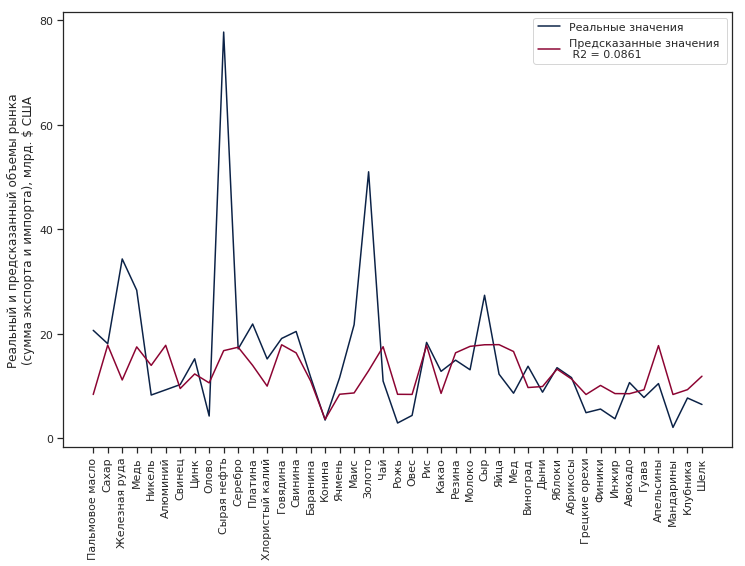

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(43))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
values = [0, 2*10**10, 4*10**10, 6*10**10, 8*10**10]
labels = [0, 20, 40, 60, 80]
plt.yticks(values, labels)
# plt.xlabel("Товар")
plt.ylabel("Реальный и предсказанный объемы рынка\n(сумма экспорта и импорта), млрд. $ США")
plt.legend([plot1, plot2], ["Реальные значения", f"Предсказанные значения \n R2 = {R2:.3}"])
ax = plt.gca()
plt.show()